## RSI

In [2]:
#optional installations: 
!pip install yfinance --upgrade --no-cache-dir
!pip3 install pandas_datareader


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

#newest yahoo API 
import yfinance as yahoo_finance

#optional 
#yahoo_finance.pdr_override()

%matplotlib inline

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22617 sha256=c04613f6fd223736f97a005e4c93064ec271b0a6ce2091e3a5d37ed77a3eb4fd
  Stored in directory: /private/var/folders/ls/5mkmbztx3nlgydqdfwwb1n_h0000gn/T/pip-ephem-wheel-cache-no334swj/wheels/aa/8a/36/59ed4f6fbcb6100967618eeb0696046bf9777a41ac2ff1f9b9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=7fecf024769c4465c8a73e681a9e735497cbfa9d25e4a92537a969b219921a84
  Stored in directory: /private/var/folders/ls/5mkmbztx3nlgydqdfwwb1n_h0000gn/T/pip-ephem-wheel-cache-no334swj/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [17]:
# ___variables___
ticker = 'pltr'

start_time = datetime.datetime(2020, 5, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat()     

In [18]:
# yahoo gives only daily historical data
connected = False
while not connected:
    try:
        ticker_df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
        connected = True
        
    except Exception as e:
        print("type error: " + str(e))
        time.sleep( 5 )
        pass   

# use numerical integer index instead of date    
ticker_df = ticker_df.reset_index()
print(ticker_df.head(5))

        Date   High   Low   Open  Close     Volume  Adj Close
0 2020-09-30  11.41  9.11  10.00   9.50  338584400       9.50
1 2020-10-01  10.10  9.23   9.69   9.46  124297600       9.46
2 2020-10-02   9.28  8.94   9.06   9.20   55018300       9.20
3 2020-10-05   9.49  8.92   9.43   9.03   36316900       9.03
4 2020-10-06  10.18  8.90   9.04   9.90   90864000       9.90


In [19]:
df = ticker_df

In [20]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [21]:
df['RSI'] = computeRSI(df['Adj Close'], 14)

In [22]:
print(df.head())
print(df.tail())

        Date   High   Low   Open  Close     Volume  Adj Close  RSI
0 2020-09-30  11.41  9.11  10.00   9.50  338584400       9.50  NaN
1 2020-10-01  10.10  9.23   9.69   9.46  124297600       9.46  NaN
2 2020-10-02   9.28  8.94   9.06   9.20   55018300       9.20  NaN
3 2020-10-05   9.49  8.92   9.43   9.03   36316900       9.03  NaN
4 2020-10-06  10.18  8.90   9.04   9.90   90864000       9.90  NaN
         Date       High        Low       Open      Close     Volume  Adj Close        RSI
90 2021-02-09  38.255001  36.130001  36.900002  38.169998   44243200  38.169998  66.979649
91 2021-02-10  38.240002  35.000000  38.150002  35.700001   45177200  35.700001  59.918945
92 2021-02-11  35.980000  32.610001  35.790001  33.110001   51863200  33.110001  53.544951
93 2021-02-12  33.650002  31.340000  33.360001  31.910000   60359100  31.910000  50.846144
94 2021-02-16  30.440001  27.299999  30.020000  27.840000  175564493  27.840000  42.940795


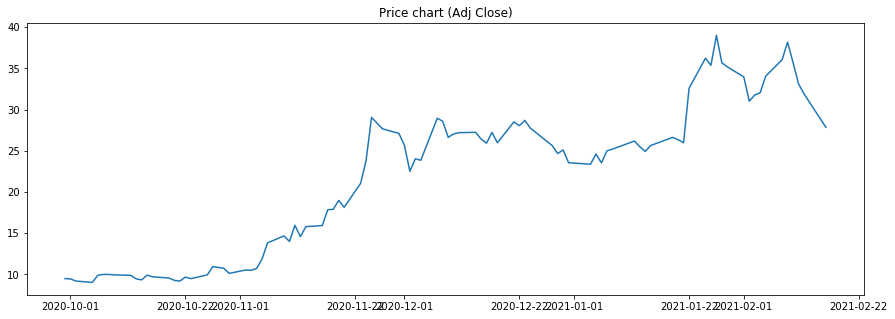

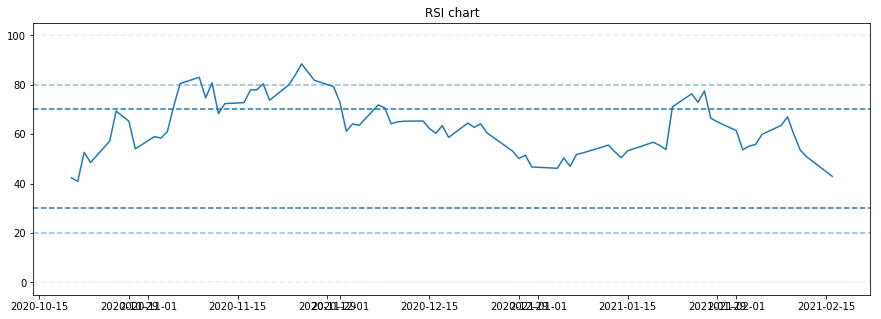

In [23]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close)')
plt.show()


# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('RSI chart')
plt.plot(df['Date'], df['RSI'])

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()